In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pymc3 as pm
import pandas as pd
import seaborn as sns
%env THEANO_FLAGS='floatX=float32,device=cuda,exception_verbosity=high'

env: THEANO_FLAGS='floatX=float32,device=cuda,exception_verbosity=high'


In [3]:
SEED = 383561
np.random.seed(SEED) # from random.org, for reproducibility

In [4]:
header = ['time', 'speed', 'lon_acc', 'yaw', 'yaw_rate', 'lat_pos', 'phi', 'headway', 'speed_limits', 'n_lanes', 'lane', 'maneuver', 'ID']
features = ['speed', 'lon_acc', 'yaw_rate', 'lat_pos', 'phi', 'headway']
source_data = pd.read_csv('data.txt', sep='\t', names=header)
feature_data = source_data[features].loc[source_data['ID'] == 2]

/home/yangwei/anaconda3/envs/theano_env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


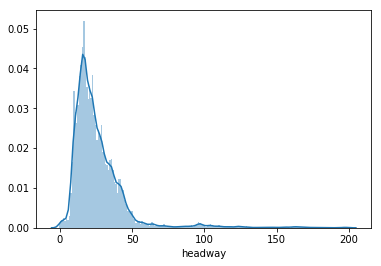

In [5]:
x = feature_data['headway']
k = 1
sns.distplot(x, 200)

In [6]:
with pm.Model() as model:
    w = pm.Dirichlet('w', np.ones(k))
    mu = pm.Normal('mu', mu=25., sd=5., shape=k)
    tau = pm.Gamma('tau', alpha=1., beta=2., shape=k)
    x_obs = pm.NormalMixture('x_obs', w, mu, tau=tau, observed=x)

TypeError: For compute_test_value, one input test value does not have the requested type.

The error when converting the test value to that variable type:
Non-unit value on shape on a broadcastable dimension.
(0,)
(True,)

In [13]:
with model:
    trace = pm.sample(10000, n_init=10000, tune=5000, random_seed=SEED)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau, mu, w]
Sampling 4 chains:   0%|          | 0/60000 [00:00<?, ?draws/s]


RuntimeError: Chain 0 failed.

/home/yangwei/.conda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/home/yangwei/.conda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/home/yangwei/.conda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27055955f8>,
      dtype=object)

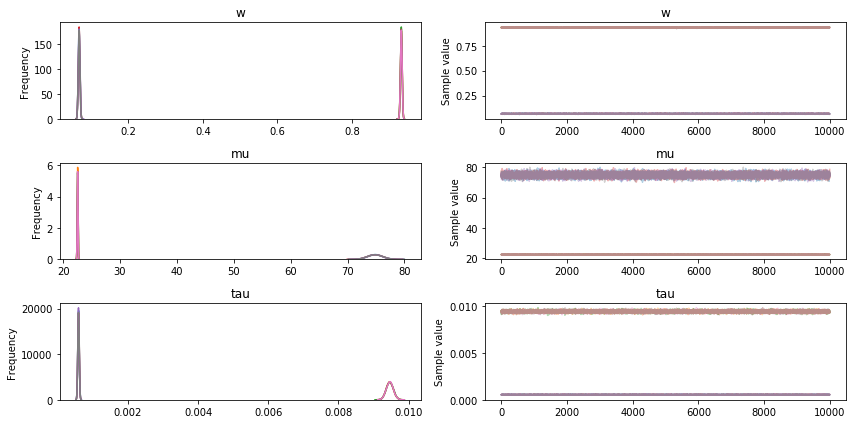

In [66]:
pm.traceplot(trace, varnames=['w', 'mu', 'tau'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f26dd790f28>,
      dtype=object)

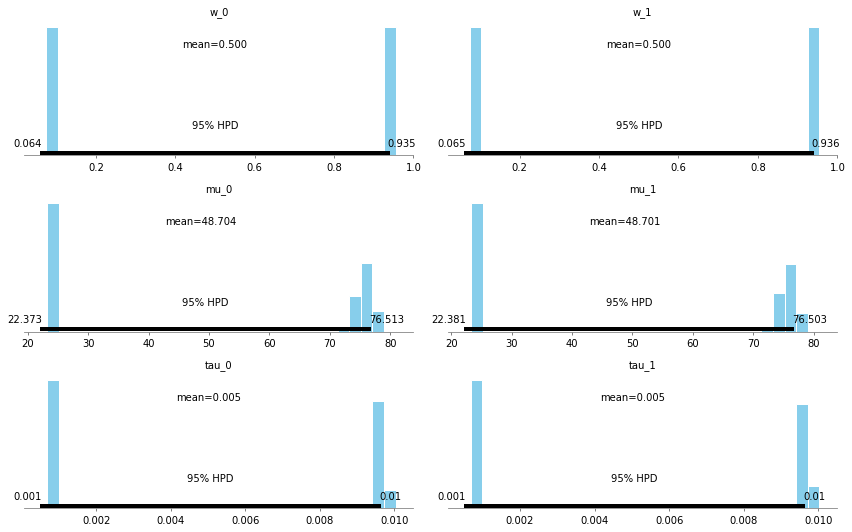

In [67]:
pm.plot_posterior(trace, varnames=['w', 'mu', 'tau'])

In [68]:
with model:
    ppc_trace = pm.sample_ppc(trace, 5000, random_seed=SEED)

100%|██████████| 5000/5000 [00:09<00:00, 506.35it/s]


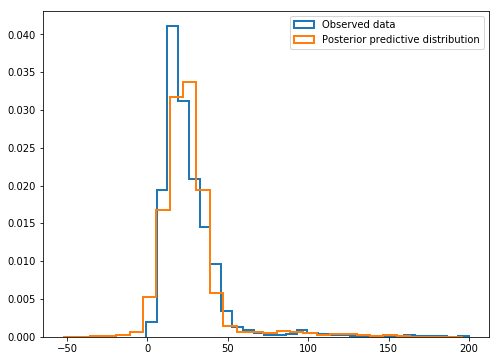

In [70]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(x, bins=30, density=True,
        histtype='step', lw=2,
        label='Observed data')
ax.hist(ppc_trace['x_obs'][:, 0], bins=30, density=True,
        histtype='step', lw=2,
        label='Posterior predictive distribution')

ax.legend(loc=1);